# =====================================
# Student Score Prediction
# Author: Syed Huzaifa Bin Khamis
# Internship: Elevvo Pathways (Cairo, Egypt)
# =====================================

In [32]:
# ----- Import Libraries -----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
# ----- Step 1: Load Dataset -----
df = pd.read_csv("StudentPerformanceFactors.csv")

In [34]:
# ----- Step 2: Explore Data -----
print("Dataset Overview:\n")
print(df.head())
print("\nShape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

✅ Dataset Overview:

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Qualit

In [35]:
# ----- Step 3: Basic Cleaning -----
# Drop rows with missing target or essential columns
df = df.dropna(subset=['Exam_Score', 'Hours_Studied'])
df = df.fillna(df.mean(numeric_only=True))  # Fill numeric NaN with mean

In [36]:
# Optional: rename columns for simplicity
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

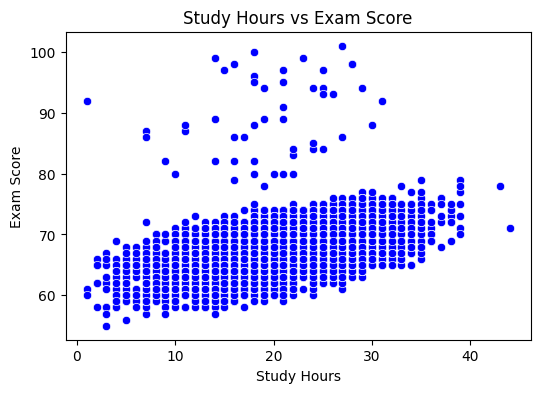

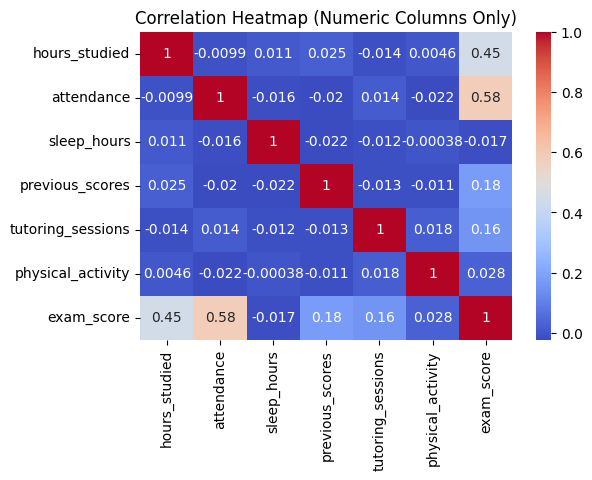

In [38]:
# ----- Step 4: Visualization (Fixed) -----
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='hours_studied', y='exam_score', color='blue')
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()



In [39]:
# ----- Step 5: Select Features -----
X = df[['hours_studied']]  # feature
y = df['exam_score']     # target

# Optional bonus: try adding other features like 'sleep_hours', 'class_participation'
if 'sleep_hours' in df.columns and 'class_participation' in df.columns:
    X = df[['study_hours', 'sleep_hours', 'class_participation']]

In [40]:
# ----- Step 6: Split Data -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# ----- Step 7: Train Linear Regression Model -----
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
# ----- Step 8: Predictions -----
y_pred = lr.predict(X_test)
y_pred

array([67.22454236, 67.79587985, 67.5102111 , ..., 68.08154859,
       67.5102111 , 68.08154859])

In [43]:
# ----- Step 9: Evaluation -----
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Linear Regression Performance:
MAE: 2.45
MSE: 10.86
RMSE: 3.29
R² Score: 0.23


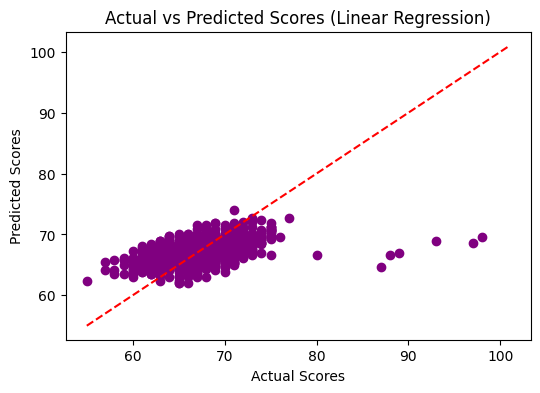

In [44]:
# ----- Step 10: Visualization of Predictions -----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Actual vs Predicted Scores (Linear Regression)")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.show()

In [45]:
# ======================================================
# BONUS PART 1: Polynomial Regression
# ======================================================

poly = PolynomialFeatures(degree=2)  # Try quadratic relation
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)

y_pred_poly = poly_model.predict(X_test_p)

In [46]:
# Evaluate
mae_poly = mean_absolute_error(y_test_p, y_pred_poly)
mse_poly = mean_squared_error(y_test_p, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_p, y_pred_poly)

print("\n📈 Polynomial Regression Performance:")
print(f"MAE: {mae_poly:.2f}")
print(f"MSE: {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R² Score: {r2_poly:.2f}")


📈 Polynomial Regression Performance:
MAE: 2.44
MSE: 10.84
RMSE: 3.29
R² Score: 0.23


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


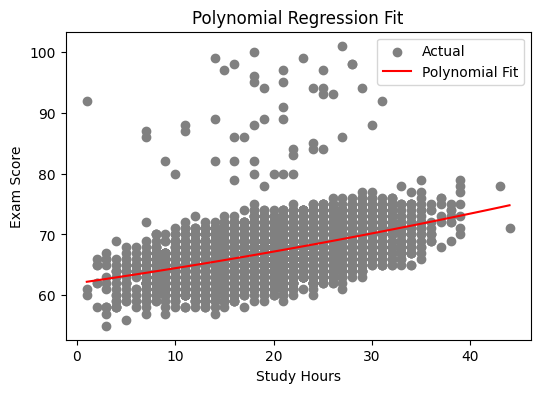

In [47]:
# Visualization
plt.figure(figsize=(6,4))
plt.scatter(X['hours_studied'], y, color='gray', label='Actual')
x_range = np.linspace(X['hours_studied'].min(), X['hours_studied'].max(), 100).reshape(-1,1)
y_range_pred = poly_model.predict(poly.transform(x_range))
plt.plot(x_range, y_range_pred, color='red', label='Polynomial Fit')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

In [48]:
# ======================================================
# BONUS PART 2: Feature Experimentation
# ======================================================

# Example: Try adding sleep_hours & participation (if available)
features = ['hours_studied']
for col in ['sleep_hours', 'class_participation']:
    if col in df.columns:
        features.append(col)

X_exp = df[features]
y_exp = df['exam_score']

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)
model_exp = LinearRegression()
model_exp.fit(X_train_e, y_train_e)
y_pred_e = model_exp.predict(X_test_e)

r2_exp = r2_score(y_test_e, y_pred_e)
print(f"\n🧩 Feature Experimentation R² Score ({features}): {r2_exp:.2f}")


🧩 Feature Experimentation R² Score (['hours_studied', 'sleep_hours']): 0.23
